In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('C:\\Users\\Abhinav\\Desktop\\RJPOLICE_HACK_224_KubeCentrix_5\\models\\25kmain.csv')

In [3]:
df.shape

(25000, 2)

In [4]:
df.size

50000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     25000 non-null  object
 1   type    25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [6]:
df.isnull().any()

url     False
type    False
dtype: bool

In [7]:
df.dtypes

url     object
type    object
dtype: object

In [8]:
df=pd.get_dummies(columns = ["type"],data=df)

In [9]:
df

,url,type_benign,type_defacement,type_malware,type_phishing
0,http://br-icloud.com.br/,False,False,False,True
1,https://mp3raid.com/,True,False,False,False
2,https://bopsecrets.org/,True,False,False,False
3,http://www.garage-pirenne.be/,False,True,False,False
4,http://adventure-nicaragua.net/,False,True,False,False
...,...,...,...,...,...
24995,http://creche-hermonville.com/,False,True,False,False
24996,https://rootsweb.ancestry.com/,True,False,False,False
24997,http://www.webhostingwisdom.com/,False,True,False,False
24998,https://google.com/,True,False,False,False


In [10]:
df['type_benign'] = df['type_benign'].astype(int)

df['type_defacement']=df['type_defacement'].astype(int)

df['type_malware']=df['type_malware'].astype(int)

df['type_phishing']=df['type_phishing'].astype(int)

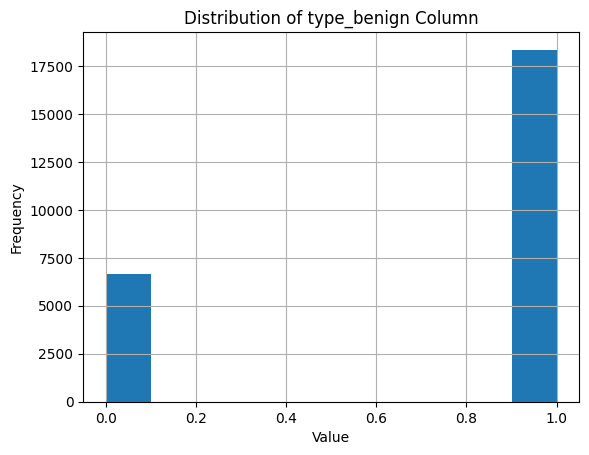

In [11]:
df['type_benign'].hist(bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of type_benign Column')
plt.show()


In [12]:
df

,url,type_benign,type_defacement,type_malware,type_phishing
0,http://br-icloud.com.br/,0,0,0,1
1,https://mp3raid.com/,1,0,0,0
2,https://bopsecrets.org/,1,0,0,0
3,http://www.garage-pirenne.be/,0,1,0,0
4,http://adventure-nicaragua.net/,0,1,0,0
...,...,...,...,...,...
24995,http://creche-hermonville.com/,0,1,0,0
24996,https://rootsweb.ancestry.com/,1,0,0,0
24997,http://www.webhostingwisdom.com/,0,1,0,0
24998,https://google.com/,1,0,0,0


taking a 25000 from the whole dataset 

In [13]:
subset_df = df.sample(n=25000, random_state=42)

In [14]:
subset_df.shape

(25000, 5)

In [15]:
subset_df.head(10)


,url,type_benign,type_defacement,type_malware,type_phishing
6868,https://celebtna.com/,1,0,0,0
24016,http://www.centercamping.com.br/,0,1,0,0
9668,http://www.elektro-vozila.si/,0,1,0,0
13640,https://metroonlinedirectory.com/,1,0,0,0
14018,https://spoke.com/,1,0,0,0
7488,http://www.swaledaleroadrunners.co.uk/,0,1,0,0
5804,https://mediagallery.usatoday.com/,1,0,0,0
12909,https://burbankbus.org/,1,0,0,0
3386,http://copyright-schweizdata.ch/,0,0,0,1
9567,http://fischereiverein.org/,0,1,0,0


In [16]:
X_text = subset_df['url']
y = subset_df[['type_benign', 'type_defacement', 'type_malware', 'type_phishing']]

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
Cmodel_1 = RandomForestClassifier()

In [21]:
multi_classifier = MultiOutputClassifier(Cmodel_1)

In [22]:
multi_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [23]:
predictions = multi_classifier.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3683
           1       0.98      0.97      0.97       910
           2       1.00      0.83      0.91       114
           3       0.89      0.87      0.88       293

   micro avg       0.99      0.98      0.99      5000
   macro avg       0.97      0.92      0.94      5000
weighted avg       0.99      0.98      0.99      5000
 samples avg       0.98      0.98      0.98      5000



C:\Users\Abhinav\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
# 25K Training Dataset

Accuracy: 0.9824


In [26]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(multi_classifier, file)